# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier #bagging 
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,auc

# Read and Display the data

In [ ]:
dataset = pd.read_csv('crop.csv')


# Describe the data

In [ ]:
dataset.describe()

,N,P,K,pH,temperature,humidity
count,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000,1019.000000
mean,40.843965,40.032385,34.969578,6.422866,26.752699,67.307164
std,23.125399,17.756150,16.312339,0.771991,6.651859,15.298370
min,2.000000,6.000000,5.000000,3.900000,17.000000,35.000000
25%,23.000000,26.000000,24.000000,6.000000,23.000000,55.000000
50%,37.000000,38.000000,33.000000,6.400000,26.000000,68.000000
75%,59.000000,55.000000,40.000000,6.900000,29.000000,79.000000
max,98.000000,82.000000,79.000000,8.900000,73.000000,95.000000


# Check the shape of data

In [ ]:
dataset.shape

(1019, 7)

# Check Nan Values

In [ ]:
dataset.isnull().sum()

vegetables/fruits    0
N                    0
P                    0
K                    0
pH                   0
temperature          0
humidity             0
dtype: int64

In [ ]:
dataset

,N,P,K,pH,temperature,humidity,label
0,26,24,38,5.6,20,87,chikoo
1,37,45,55,5.9,19,85,chikoo
2,38,30,68,5.3,24,83,chikoo
3,16,24,10,5.3,22,90,chikoo
4,21,24,65,5.3,25,85,chikoo
...,...,...,...,...,...,...,...
1014,35,18,30,6.4,29,88,coconut
1015,13,20,38,5.5,26,89,coconut
1016,23,17,40,6.3,26,89,coconut
1017,13,33,35,6.0,27,94,coconut


# Define X and Y

In [ ]:
x= dataset.iloc[:,:-1] 

y = dataset.iloc[:,-1]

# Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.fit_transform(X_test)


# Build the Models

# Decision tree

In [ ]:
cls = DecisionTreeClassifier(max_depth=10,splitter='best') 
cls.fit(X_train,y_train) #training of classifier
y_pred = cls.predict(X_test) 


In [ ]:
dt_acc=accuracy_score(y_test,y_pred)
dt_cls=classification_report(y_test, y_pred)

# Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=9,random_state=0)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [ ]:
rf_acc=accuracy_score(y_test,y_pred)
rf_cls=classification_report(y_test, y_pred)

# Support Vector Machine

In [ ]:
svm = SVC(probability=True,kernel = 'linear', random_state =1)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)


In [ ]:
svm_acc=accuracy_score(y_test,y_pred)
svm_cls=classification_report(y_test, y_pred)

# Bagging

In [ ]:
estimators = []
model1=  RandomForestClassifier()
estimators.append(('RandomForest', model1)) 
model2=  DecisionTreeClassifier()
estimators.append(('DecisionTree', model2)) 
model3 = SVC(probability=True)
estimators.append(('svm', model3))
ensemble = VotingClassifier(estimators,voting='soft') #bagging ensembLe 
eclf1 = ensemble.fit(X_train,y_train) 
y_pred=eclf1.predict(X_test)


In [ ]:
ens_acc=accuracy_score(y_test,y_pred)
ens_cls=classification_report(y_test, y_pred)

# XGBoost

In [ ]:
ab = XGBClassifier()
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)



In [ ]:
xg_acc=accuracy_score(y_test,y_pred)
xg_cls=classification_report(y_test, y_pred)

# Accuracy

In [ ]:
print("Accuracy for Decision Tree: ",dt_acc)
print("\n\n")

print("Accuracy for Random Forest: ",rf_acc)
print("\n\n")

print("Accuracy for SVM: ",svm_acc)
print("\n\n")

print("Accuracy for Bagging Method: ",ens_acc)
print("\n\n")

print("Accuracy for XGboost: ",xg_acc)

Accuracy for Decision Tree:  0.9607843137254902



Accuracy for Random Forest:  0.9607843137254902



Accuracy for SVM:  0.9607843137254902



Accuracy for Bagging Method:  0.9656862745098039



Accuracy for XGboost:  0.9558823529411765


# Classification Report

In [ ]:
print("Classification Report for Decision Tree: \n",dt_cls)
print("\n\n")

print("Classification Report for Random Forest: \n",rf_cls)
print("\n\n")

print("Classification Report for SVM:\n ",svm_cls)
print("\n\n")

print("Classification Report for Bagging Method: \n",ens_cls)
print("\n\n")

print("Classification Report for Xgboost: ",xg_cls)

Classification Report for Decision Tree: 
               precision    recall  f1-score   support

       chana       1.00      1.00      1.00        25
      chikoo       1.00      0.88      0.94        17
     coconut       0.85      1.00      0.92        23
        corn       0.92      0.96      0.94        23
   jackfruit       1.00      0.84      0.91        25
       mango       1.00      1.00      1.00        17
       methi       1.00      1.00      1.00        19
    sitaphal       1.00      1.00      1.00        21
   sugarcane       1.00      0.95      0.98        21
       wheat       0.67      0.77      0.71        13

    accuracy                           0.95       204
   macro avg       0.94      0.94      0.94       204
weighted avg       0.95      0.95      0.95       204




Classification Report for Random Forest: 
               precision    recall  f1-score   support

       chana       1.00      1.00      1.00        25
      chikoo       1.00      0.94      0.97

# Accuracy

In [ ]:
x=['Decision Tree','Random Forest','SVM','Bagging','Xgboost']
yacc=[dt_acc,rf_acc,svm_acc,ens_acc,xg_acc]


In [ ]:
data = {'Algorithms':x,
        'Accuracy':yacc,
        }

In [ ]:
df_acc=pd.DataFrame(data)
df_acc.head(5)

,Algorithms,Accuracy
0,Decision Tree,0.960784
1,Random Forest,0.960784
2,SVM,0.960784
3,Bagging,0.965686
4,Xgboost,0.955882


In [ ]:
df_acc.to_csv('Accuracy.csv',index=False)

# Comparison of Accuracy

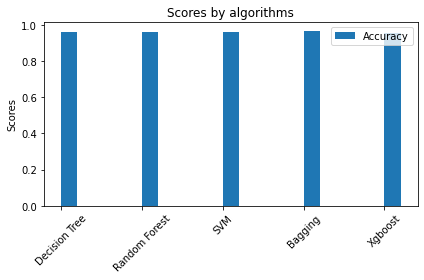

In [ ]:
labels = df_acc['Algorithms']
acc = df_acc['Accuracy']


x = np.arange(len(labels))  # the label locations
w = 0.6
dimw = w / 3
fig, ax = plt.subplots()
rects1 = ax.bar(x+1*dimw, acc, dimw, label='Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by algorithms')
ax.set_xticks(x + dimw / 2)
ax.set_xticklabels(labels,rotation = 45)
ax.legend()

fig.tight_layout()

plt.show()

# Prediction

In [ ]:

N=input('Enter N:')
P=input('Enter P:')
K=input('Enter k:')
pH=input('Enter PH:')
temp=input('Enter temperature:')
humidity=input('Enter humidity:')

Output=ensemble.predict([[
          
                   float(N),
                   float(P),
                   float(K),
                   float(pH),
                   float(temp),
                   float(humidity)
                   ]])
print(Output)
print('Fertility Production:',Output)

Enter N:29
Enter P:72
Enter k:70
Enter PH:8.5
Enter temperature:35
Enter humidity:64
['chana']
Fertility Production: ['chana']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
